# Example of Supervised Regression Problem
##### Objective
Our objective is to predict the strength of a concrete mixture given the composition of the concrete mixture.

Grab the dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

Load up the data and display the top 5 rows to get a feel for it.

In [2]:
df = pd.read_csv("Concrete_Data.csv")
df.columns = ['Cement',
       'Blast Furnace Slag',
       'Fly Ash',
       'Water',
       'Superplasticizer',
       'Coarse Aggregate',
       'Fine Aggregate', 
        'Age',
       'Concrete compressive strength']
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Train/validation/test split
As part of model validation, we will set up a train/validation/test split. We use the training data to determine model parameters, the validation data to test model performance and make tweaks to it and the test set to determine final model performance (remember, try to use this once only!).

In [3]:
# Separate into input features (X) and targets (y). We can do this before or after splitting.
y = df['Concrete compressive strength']
X = df.drop(['Concrete compressive strength'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

### Data exploration
It often helps to explore the training data to get an idea of exactly what you're working with. We'll do a few plots of how the target variable (concrete strength) varies according to some of the input features. This is by no means an exhaustive analysis.

Text(0.5, 1.0, 'Amount of cement in mixture vs concrete strength')

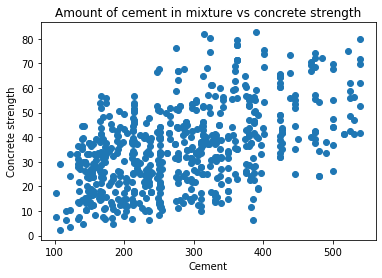

In [4]:
plt.scatter(X_train.Cement, y_train)
plt.xlabel("Cement")
plt.ylabel("Concrete strength")
plt.title("Amount of cement in mixture vs concrete strength")

Text(0.5, 1.0, 'Age of concrete vs concrete strength')

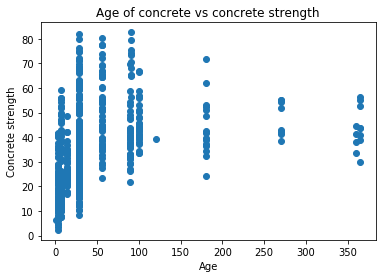

In [5]:
plt.scatter(X_train.Age, y_train)
plt.xlabel("Age")
plt.ylabel("Concrete strength")
plt.title("Age of concrete vs concrete strength")

Text(0.5, 1.0, 'Amount of Superplasticizer vs concrete strength')

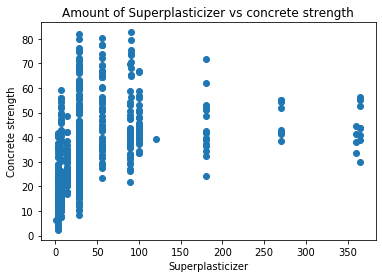

In [6]:
plt.scatter(X_train.Age, y_train)
plt.xlabel("Superplasticizer")
plt.ylabel("Concrete strength")
plt.title("Amount of Superplasticizer vs concrete strength")

### Model training
We will use simple linear regression.

In [7]:
linear_reg = LinearRegression().fit(X_train, y_train) # Easy!

### Performance evaluation
Here we use the validation set to see how well we did. We can make some changes if we feel we could do better.

Val RMSE: 10.816013533331343


Text(0, 0.5, 'Predicted')

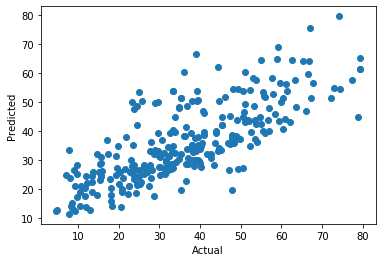

In [8]:
val_predictions = linear_reg.predict(X_val)

val_rmse = np.sqrt(mean_squared_error(val_predictions, y_val))
print("Val RMSE: {}".format(val_rmse))

plt.scatter(y_val, val_predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")

The concrete strength ranges from roughly 0 to 80, so a mean error of roughly 10 isn't bad. Linear regression is quite a simple model, so we could probably get better performance from a more complex model. 

##### Which model should we use next? Do we need to change the data or our validation procedure?

The beauty of having a solid model validation framework is that you can throw whatever models or methods you like at the problem and not worry about what they're doing under the hood. All you need to worry about is how they perform on the validation and test sets. Think of the test set as being a way to simulate deploying the model in the real world on unseen data.

Let's try AdaBoost and a random forest.

In [9]:
adaboost = AdaBoostRegressor(n_estimators=300).fit(X_train, y_train)
random_forest = RandomForestRegressor(max_depth=5, n_estimators=300).fit(X_train, y_train)

Val RMSE: 8.109187993862886


Text(0, 0.5, 'Predicted')

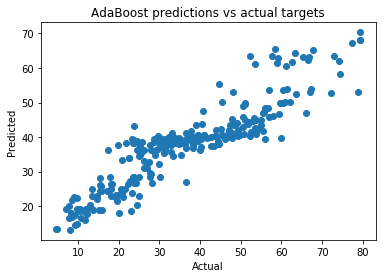

In [10]:
val_predictions = adaboost.predict(X_val)

val_rmse = np.sqrt(mean_squared_error(val_predictions, y_val))
print("Val RMSE: {}".format(val_rmse))

plt.scatter(y_val, val_predictions)
plt.title("AdaBoost predictions vs actual targets")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Val RMSE: 6.576392962417803


Text(0, 0.5, 'Predicted')

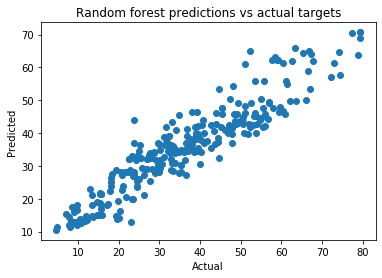

In [11]:
val_predictions = random_forest.predict(X_val)

val_rmse = np.sqrt(mean_squared_error(val_predictions, y_val))
print("Val RMSE: {}".format(val_rmse))

plt.scatter(y_val, val_predictions)
plt.title("Random forest predictions vs actual targets")
plt.xlabel("Actual")
plt.ylabel("Predicted")

### Final performance testing of the best model
We made improvements over linear regression with both AdaBoost and the random forest. The random forest model looks like it's the best, so we will choose it as the "best" model. We now try it out on the withheld test set to get an idea of how it might perform in the wild..


##### Why did we withhold the test data?
We don't want to make decisions about what model we should use based on the test data. This is because the test data represents data in the wild that we won't have access to in production. 

##### Why use the test data only once?
Once we've seen the test data, it will influence any decisions we might make when building our model. As such, it will then begin influencing our model selection process in a way that is unrealistic - we can't choose a model based on data we can't see when we go and use our model in real life!

In [12]:
# One thing we need to do is retrain the random forest using both the training and validation data.
# Before the final test, we should be using *all* the data we have to train the model, excluding the
# test data itself.

X_concat = pd.concat([X_train, X_val])
y_concat = pd.concat([y_train, y_val])

random_forest = RandomForestRegressor(max_depth=5, n_estimators=300).fit(X_concat, y_concat)

Val RMSE: 6.701090381926203


Text(0, 0.5, 'Predicted')

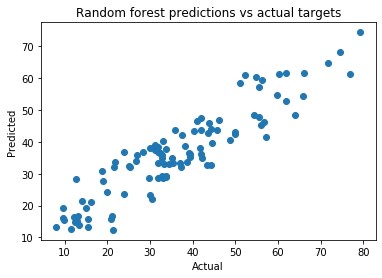

In [13]:
test_predictions = random_forest.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(test_predictions, y_test))
print("Val RMSE: {}".format(test_rmse))

plt.scatter(y_test, test_predictions)
plt.title("Random forest predictions vs actual targets")
plt.xlabel("Actual")
plt.ylabel("Predicted")

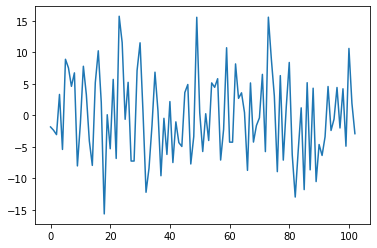

In [15]:
plt.plot(np.array(y_test-test_predictions))